This notebook contains functionality to perform the following:

The point of this notebook is to explore and visualize correlation maps between nucleotide frequencies and target values, with the processed hidra starr dataset as the example. 

In [ ]:
# mount google drive

from google.colab import drive
drive.mount('/content/drive')

%cd '/content/drive/Shareddrives/NRC_Amii_Agronomics_Project/nrc-ml-plant-genomics/'

In [ ]:
from subprocess import run
import sys
import os
import time

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import spearmanr # https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html
from sklearn.metrics import r2_score

In [ ]:
df = pd.read_csv("data/processed/hidra_chloroplast_70.csv")

In [ ]:
nts = ["A", "T", "C", "G"]  # list of single nucleotides
dnts = [nt1+nt2 for nt1 in nts for nt2 in nts]  # list of dinucleotides
tnts = [nt1+nt2+nt3 for nt1 in nts for nt2 in nts for nt3 in nts]  # list of dinucleotides

In [ ]:
dnt_freqs = []  
for i in range(df.shape[0]):
  sqnc_freq = []
  for item in dnts:
    sqnc_freq.append(df.loc[i, "sequence"].count(item))
  dnt_freqs.append(sqnc_freq)
df[dnts] = dnt_freqs  # sets dnt frequencies in dataframe

tnt_freqs = []
for i in range(df.shape[0]):
  sqnc_freq = []
  for item in tnts:
    sqnc_freq.append(df.loc[i, "sequence"].count(item))
  tnt_freqs.append(sqnc_freq)
df[tnts] = tnt_freqs  # sets tnt frequencies in dataframe

In [ ]:
df.head()

,organelle,start_coords,end_coords,sequence,control_raw_coverage,treatment_raw_coverage,control_norm_coverage,treatment_norm_coverage,target,A,T,C,G,set,AA,AT,AC,AG,TA,TT,TC,TG,CA,CT,CC,CG,GA,GT,GC,GG,AAA,AAT,AAC,AAG,ATA,ATT,ATC,ATG,ACA,ACT,...,TCA,TCT,TCC,TCG,TGA,TGT,TGC,TGG,CAA,CAT,CAC,CAG,CTA,CTT,CTC,CTG,CCA,CCT,CCC,CCG,CGA,CGT,CGC,CGG,GAA,GAT,GAC,GAG,GTA,GTT,GTC,GTG,GCA,GCT,GCC,GCG,GGA,GGT,GGC,GGG
0,NC_016734.1,0,145,AATCATAATAACTTGGTCCCGGGCATCACGGGCGAACGACGGGAAT...,998,316,338.31,405.52,0.26,39,40,40,26,test,10,15,12,0,11,8,11,9,10,11,8,8,6,5,6,6,1,6,3,0,4,3,7,1,3,5,...,4,3,4,0,2,3,1,3,1,5,4,0,5,4,1,1,2,2,3,3,3,0,2,3,4,1,1,0,1,1,2,1,1,1,2,2,1,2,3,3
1,NC_016734.1,5,150,TAATAACTTGGTCCCGGGCATCACGGGCGAACGACGGGAATTGAAC...,998,318,338.31,408.08,0.27,40,40,39,26,test,11,14,12,0,12,8,10,9,9,11,8,8,6,5,6,6,2,6,3,0,4,3,6,1,3,5,...,3,3,4,0,2,3,1,3,1,4,4,0,5,4,1,1,2,2,3,3,3,0,2,3,4,1,1,0,1,1,2,1,1,1,2,2,1,2,3,3
2,NC_016734.1,10,155,ACTTGGTCCCGGGCATCACGGGCGAACGACGGGAATTGAACCCGCG...,998,318,338.31,408.08,0.27,38,38,42,27,test,9,13,14,0,10,8,10,9,10,11,8,9,6,5,7,6,2,5,3,0,3,3,6,1,4,5,...,3,3,4,0,2,3,1,3,1,4,5,0,5,4,1,1,2,2,3,3,3,0,3,3,4,1,1,0,1,1,2,1,1,1,2,2,1,2,3,3
3,NC_016734.1,15,160,GTCCCGGGCATCACGGGCGAACGACGGGAATTGAACCCGCGATGGT...,998,318,338.31,408.08,0.27,40,36,42,27,test,10,13,13,1,10,7,10,8,12,10,8,9,6,5,8,5,2,5,3,0,3,3,6,1,4,4,...,3,3,4,0,2,3,1,2,2,4,5,1,5,3,1,1,2,2,3,3,3,0,3,3,4,1,1,0,1,1,2,1,3,1,2,2,1,1,3,3
4,NC_016734.1,20,165,GGGCATCACGGGCGAACGACGGGAATTGAACCCGCGATGGTGAATT...,998,318,338.31,408.08,0.27,41,39,39,26,test,10,15,13,1,11,8,9,8,12,10,7,8,6,4,8,5,2,6,3,0,4,4,6,1,4,4,...,3,3,3,0,2,3,1,2,2,4,5,1,5,3,1,1,2,2,2,2,3,0,3,2,4,1,1,0,1,1,1,1,3,1,2,2,1,1,3,3


In [ ]:
df[nts]

,A,T,C,G
0,39,40,40,26
1,40,40,39,26
2,38,38,42,27
3,40,36,42,27
4,41,39,39,26
...,...,...,...,...
24687,66,39,18,22
24688,66,40,19,20
24689,64,42,18,21
24690,62,39,21,23


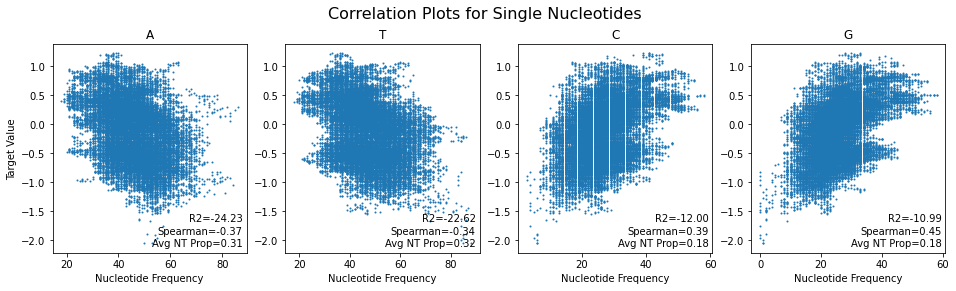

In [ ]:
# singles

fig, axs = plt.subplots(1, 4, figsize=(16,4))

fig.patch.set_facecolor('white')

for i in range(len(nts)):
    spearman = spearmanr(df[nts[i]], df["target"])[0]
    r2 = r2_score(df[nts[i]], df["target"])
    
    nt = np.mean(df[nts[i]]/145) # average nucleotide percentage

    axs[i].scatter(df[nts[i]], df["target"], s=1)

    axs[i].set_title(nts[i])

    axs[i].text(0.98, 0.08, 'Spearman=%.2f'%spearman, horizontalalignment='right', verticalalignment='bottom', transform=axs[i].transAxes)
    axs[i].text(0.98, 0.14, 'R2=%.2f'%r2, horizontalalignment='right', verticalalignment='bottom', transform=axs[i].transAxes)
    axs[i].text(0.98, 0.02, 'Avg NT Prop=%.2f'%nt, horizontalalignment='right', verticalalignment='bottom', transform=axs[i].transAxes)

    if i == 0:
        axs[i].set(ylabel='Target Value')
    axs[i].set(xlabel='Nucleotide Frequency')

# for ax in axs.flat:
#     ax.set(xlabel='Nucleotide Frequency', ylabel='Target Value')

# Hide x labels and tick labels for top plots and y ticks for right plots.
# for ax in axs.flat:
#     ax.label_outer()
    
fig.suptitle('Correlation Plots for Single Nucleotides', fontsize=16)
plt.subplots_adjust(top=0.85)
plt.show()

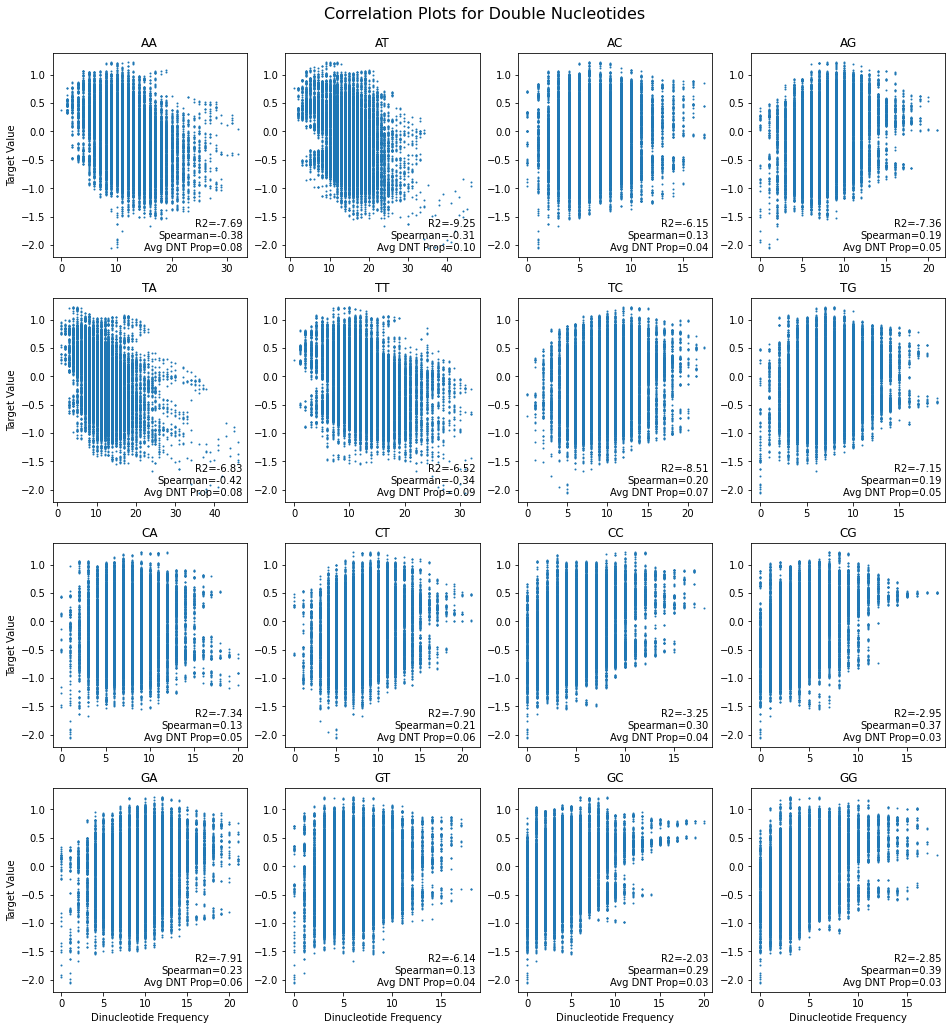

In [ ]:
# singles

fig, axs = plt.subplots(4, 4, figsize=(16,16))

fig.patch.set_facecolor('white')

for i in range(len(nts)):
    for j in range(len(nts)):
      spearman = spearmanr(df[nts[i]+nts[j]], df["target"])[0]
      r2 = r2_score(df[nts[i]+nts[j]], df["target"])
      nt = np.mean((df[nts[i]+nts[j]])/144) # average nucleotide percentage

      axs[i][j].scatter(df[nts[i]+nts[j]], df["target"], s=1)

      axs[i][j].set_title(nts[i]+nts[j])

      axs[i][j].text(0.98, 0.08, 'Spearman=%.2f'%spearman, horizontalalignment='right', verticalalignment='bottom', transform=axs[i][j].transAxes)
      axs[i][j].text(0.98, 0.14, 'R2=%.2f'%r2, horizontalalignment='right', verticalalignment='bottom', transform=axs[i][j].transAxes)
      axs[i][j].text(0.98, 0.02, 'Avg DNT Prop=%.2f'%nt, horizontalalignment='right', verticalalignment='bottom', transform=axs[i][j].transAxes)

      if i == 3:
        axs[i][j].set(xlabel='Dinucleotide Frequency')
      if j == 0:
        axs[i][j].set(ylabel='Target Value')

# # Hide x labels and tick labels for top plots and y ticks for right plots.
# for ax in axs.flat:
#     ax.label_outer()
    
fig.suptitle('Correlation Plots for Double Nucleotides', fontsize=16)
plt.subplots_adjust(top=0.94)
plt.show()